In [2]:
#1 Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default='svg'


In [3]:
#2 Importing the dataset
raw_df=pd.read_csv('zomato_Mumbai_dataset.csv',delimiter='|')


In [4]:
raw_df.head()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Mumbai,First International Financial Centre-- Bandra ...,https://www.zomato.com/mumbai/hitchki-bandra-k...,1,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mumbai,Mahim,https://www.zomato.com/mumbai/baba-falooda-mah...,1,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Mumbai,Juhu,https://www.zomato.com/mumbai/chin-chin-chu-ju...,1,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/butterfly-high-b...,1,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/bkc-dive-bandra-...,1,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995


In [5]:
raw_df.describe()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
count,15081,15080,15079,15080,15080,15080,15080,15080,15015,14070,15080,15080
unique,12720,67,3183,2,241,13823,944,23,2551,31,35,1124
top,NAME,400,CUSINE_CATEGORY,Mumbai,REGION,URL,PAGE NO,Quick Bites,11am to 11pm(Mon-Sun),Average,-,-
freq,942,2042,942,14138,942,942,942,5262,1192,5112,2360,2360


In [6]:
#3 Getting basic information about the dataset
raw_df.shape

(15081, 12)

In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15081 entries, 0 to 15080
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NAME             15081 non-null  object
 1   PRICE            15080 non-null  object
 2   CUSINE_CATEGORY  15079 non-null  object
 3   CITY             15080 non-null  object
 4   REGION           15080 non-null  object
 5   URL              15080 non-null  object
 6   PAGE NO          15080 non-null  object
 7   CUSINE TYPE      15080 non-null  object
 8   TIMING           15015 non-null  object
 9   RATING_TYPE      14070 non-null  object
 10  RATING           15080 non-null  object
 11  VOTES            15080 non-null  object
dtypes: object(12)
memory usage: 1.4+ MB


In [8]:
#4 Cleaning the dataset
#4a Removing the redundant rows of data
wrong_data=raw_df['PAGE NO']=='PAGE NO'
raw_df[wrong_data]

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
31,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
47,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
63,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
79,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
...,...,...,...,...,...,...,...,...,...,...,...,...
15000,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15016,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15032,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15048,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES


In [9]:
raw_df=raw_df[~wrong_data]

In [10]:
raw_df.head()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Mumbai,First International Financial Centre-- Bandra ...,https://www.zomato.com/mumbai/hitchki-bandra-k...,1,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mumbai,Mahim,https://www.zomato.com/mumbai/baba-falooda-mah...,1,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Mumbai,Juhu,https://www.zomato.com/mumbai/chin-chin-chu-ju...,1,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/butterfly-high-b...,1,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/bkc-dive-bandra-...,1,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995


In [11]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14139 entries, 0 to 15080
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NAME             14139 non-null  object
 1   PRICE            14138 non-null  object
 2   CUSINE_CATEGORY  14137 non-null  object
 3   CITY             14138 non-null  object
 4   REGION           14138 non-null  object
 5   URL              14138 non-null  object
 6   PAGE NO          14138 non-null  object
 7   CUSINE TYPE      14138 non-null  object
 8   TIMING           14073 non-null  object
 9   RATING_TYPE      13128 non-null  object
 10  RATING           14138 non-null  object
 11  VOTES            14138 non-null  object
dtypes: object(12)
memory usage: 1.4+ MB


In [12]:
raw_df.drop(['URL', 'PAGE NO', 'CITY'], axis = 1, inplace=True)
raw_df.head()

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995


In [13]:
raw_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 14139 entries, 0 to 15080
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NAME             14139 non-null  object
 1   PRICE            14138 non-null  object
 2   CUSINE_CATEGORY  14137 non-null  object
 3   REGION           14138 non-null  object
 4   CUSINE TYPE      14138 non-null  object
 5   TIMING           14073 non-null  object
 6   RATING_TYPE      13128 non-null  object
 7   RATING           14138 non-null  object
 8   VOTES            14138 non-null  object
dtypes: object(9)
memory usage: 1.1+ MB


In [14]:
#4b Removing null records
raw_df.isnull().sum()

NAME                  0
PRICE                 1
CUSINE_CATEGORY       2
REGION                1
CUSINE TYPE           1
TIMING               66
RATING_TYPE        1011
RATING                1
VOTES                 1
dtype: int64

In [15]:
#Checking for a null row
raw_df[raw_df['PRICE'].isnull()]

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15080,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#dropping the above row from the dataset
raw_df=raw_df.drop(labels=15080,axis=0)


In [17]:
#replacing the other null records with NA
raw_df.fillna('NA',inplace=True)



In [18]:
raw_df.isnull().sum()

NAME               0
PRICE              0
CUSINE_CATEGORY    0
REGION             0
CUSINE TYPE        0
TIMING             0
RATING_TYPE        0
RATING             0
VOTES              0
dtype: int64

In [19]:
#4c converting the datatypes of numerical columns to numeric datatypes
#checking for text values
raw_df['RATING'].value_counts()


RATING
-          2360
3.5        1094
3.4        1036
3.6         960
NEW         953
3.3         926
3.7         917
3.2         801
3.8         782
3.1         734
3.0         622
3.9         596
2.9         409
4.0         408
2.8         309
4.1         298
4.2         199
2.7         170
4.3         148
4.4          99
2.6          77
Opening      57
4.5          46
2.5          39
4.6          32
2.4          26
4.7          13
2.3          10
2.1           5
2.2           4
4.8           4
4.9           2
1.8           1
2.0           1
Name: count, dtype: int64

In [20]:
raw_df['RATING'].replace(to_replace=['_','NEW','Opening'],value='0',inplace=True)
raw_df['RATING'].value_counts()

C:\Users\KP\AppData\Local\Temp\ipykernel_5148\639675724.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





RATING
-      2360
3.5    1094
3.4    1036
0      1010
3.6     960
3.3     926
3.7     917
3.2     801
3.8     782
3.1     734
3.0     622
3.9     596
2.9     409
4.0     408
2.8     309
4.1     298
4.2     199
2.7     170
4.3     148
4.4      99
2.6      77
4.5      46
2.5      39
4.6      32
2.4      26
4.7      13
2.3      10
2.1       5
4.8       4
2.2       4
4.9       2
1.8       1
2.0       1
Name: count, dtype: int64

In [21]:
raw_df['VOTES'].value_counts()

VOTES
-       2360
NEW      953
4        364
5        320
6        288
        ... 
1029       1
7350       1
964        1
585        1
1249       1
Name: count, Length: 1123, dtype: int64

In [22]:
raw_df['VOTES'].replace(to_replace=['_','NEW','Opening'],value='0',inplace=True)
raw_df['VOTES'].value_counts()

C:\Users\KP\AppData\Local\Temp\ipykernel_5148\3869826021.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





VOTES
-       2360
0       1011
4        364
5        320
6        288
        ... 
1029       1
7350       1
964        1
585        1
1249       1
Name: count, Length: 1121, dtype: int64

In [23]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14138 entries, 0 to 15079
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NAME             14138 non-null  object
 1   PRICE            14138 non-null  object
 2   CUSINE_CATEGORY  14138 non-null  object
 3   REGION           14138 non-null  object
 4   CUSINE TYPE      14138 non-null  object
 5   TIMING           14138 non-null  object
 6   RATING_TYPE      14138 non-null  object
 7   RATING           14138 non-null  object
 8   VOTES            14138 non-null  object
dtypes: object(9)
memory usage: 1.1+ MB


In [24]:
#4d WORKING WITH 'Timning' column
raw_df['TIMING'].value_counts()

TIMING
11am to 11pm(Mon-Sun)                              1192
11am to 12midnight(Mon-Sun)                         632
12noon to 12midnight(Mon-Sun)                       467
11am to 1130pm(Mon-Sun)                             309
10am to 10pm(Mon-Sun)                               267
                                                   ... 
1130am to 4pm,630pm to 1230AM...                      1
12midnight to 5am,12noon to 12midnight(Mon-Sun)       1
12midnight to 1230AM,12noon to 4pm,7pm to ...         1
12noon to 330pm,630pm to 12midnight...                1
8am to 11pm,12midnight to 115am(Mon-Sun)              1
Name: count, Length: 2551, dtype: int64

In [25]:
#Splitting the column and storing it in temp_df dataframe
temp_df=raw_df['TIMING'].str.split('(',n=1,expand=True)
temp_df

,0,1
0,12noon to 130am,Mon-Sun)
1,2pm to 1am,Mon-Sun)
2,12noon to 1am,Mon-Sun)
3,12noon to 130am,Mon-Sun)
4,1130am to 1am,Mon-Sun)
...,...,...
15075,"8am to 11pm,12midnight to 115am",Mon-Sun)
15076,11am to 230am,Mon-Sun)
15077,11am to 11pm,"Mon,Tue,Wed,Thu,Sun),11am to ..."
15078,9am to 1230AM,Mon-Sun)


In [26]:
raw_df['Timing']=temp_df[0]
raw_df['DAYS_OPEN']=temp_df[1]
raw_df.head()

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,Timing,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529,12noon to 130am,Mon-Sun)
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723,2pm to 1am,Mon-Sun)
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337,12noon to 1am,Mon-Sun)
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200,12noon to 130am,Mon-Sun)
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995,1130am to 1am,Mon-Sun)


In [27]:
raw_df['DAYS_OPEN']=raw_df['DAYS_OPEN'].str.replace(r'\)','',regex=True)
raw_df.head()


,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,Timing,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529,12noon to 130am,Mon-Sun
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723,2pm to 1am,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337,12noon to 1am,Mon-Sun
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200,12noon to 130am,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995,1130am to 1am,Mon-Sun


In [28]:
raw_df.isnull().sum()

NAME                 0
PRICE                0
CUSINE_CATEGORY      0
REGION               0
CUSINE TYPE          0
TIMING               0
RATING_TYPE          0
RATING               0
VOTES                0
Timing               0
DAYS_OPEN          160
dtype: int64

In [29]:
raw_df=raw_df.fillna('NA')
raw_df.isnull().sum()

NAME               0
PRICE              0
CUSINE_CATEGORY    0
REGION             0
CUSINE TYPE        0
TIMING             0
RATING_TYPE        0
RATING             0
VOTES              0
Timing             0
DAYS_OPEN          0
dtype: int64

In [30]:
#4e Removing the restaurant records whose rating or vote is 0
useless_data=(raw_df['RATING']==0.0)|(raw_df['VOTES']==0)
raw_df[useless_data]

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,Timing,DAYS_OPEN


In [31]:
raw_df[~useless_data]

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,Timing,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529,12noon to 130am,Mon-Sun
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723,2pm to 1am,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337,12noon to 1am,Mon-Sun
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200,12noon to 130am,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995,1130am to 1am,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...,...
15075,Tirupati Balaji,500,"Chinese,Fast Food,North Indian",Oshiwara-- Andheri West,Casual Dining,"8am to 11pm,12midnight to 115am(Mon-Sun)",Good,3.5,267,"8am to 11pm,12midnight to 115am",Mon-Sun
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Kandivali West,Quick Bites,11am to 230am(Mon-Sun),Good,3.7,64,11am to 230am,Mon-Sun
15077,PitaBurg,400,"Fast Food,Lebanese",Lower Parel,none,"11am to 11pm(Mon,Tue,Wed,Thu,Sun),11am to ...",Average,3.4,99,11am to 11pm,"Mon,Tue,Wed,Thu,Sun,11am to ..."
15078,Uncha Otlawala,300,"Desserts,Ice Cream",Kandivali West,Dessert Parlor,9am to 1230AM(Mon-Sun),Good,3.5,29,9am to 1230AM,Mon-Sun


In [32]:
#4f  Working on 'RATING_TYPE' Column
raw_df['RATING_TYPE'].value_counts()

RATING_TYPE
Average          5112
Good             4330
Not rated        2360
Very Good        1137
NA               1010
Excellent          95
Poor               47
Veľmi dobré         6
Skvělá volba        4
Dobrze              4
Bardzo dobrze       3
İyi                 2
Dobré               2
Průměr              2
Ortalama            2
Promedio            2
Bueno               2
Priemer             2
Bom                 2
Buono               2
Muito Bom           2
Média               1
Baik                1
Skvělé              1
Biasa               1
Çok iyi             1
Sangat Baik         1
Excelente           1
Velmi dobré         1
Muy Bueno           1
Media               1
Name: count, dtype: int64

In [33]:
raw_df['RATING_TYPE'].replace(to_replace='Excelente',value='Excellent',inplace=True)
raw_df['RATING_TYPE'].replace(to_replace=['Veľmi dobré','Bardzo dobrze','Muy Bueno','Velmi dobré'] , value='Very Good',inplace=True)
raw_df['RATING_TYPE'].replace(to_replace=['Skvělá volba','Dobrze','Bueno','Buono','Dobré','Bom','Skvělé'] , value='Good', inplace=True)
raw_df['RATING_TYPE'].replace(to_replace=['Priemer','Média','Çok iyi'] , value='Average', inplace=True)
raw_df['RATING_TYPE'].replace(to_replace=['Průměr','Promedio','Ortalama','Muito Bom','İyi'] , value='Poor', inplace=True)
raw_df['RATING_TYPE'].replace(to_replace=['Baik','Biasa','Media','Sangat Baik'] , value='Very Poor', inplace=True)


C:\Users\KP\AppData\Local\Temp\ipykernel_5148\50378620.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\KP\AppData\Local\Temp\ipykernel_5148\50378620.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [34]:
raw_df['RATING_TYPE'].value_counts()

RATING_TYPE
Average      5116
Good         4347
Not rated    2360
Very Good    1148
NA           1010
Excellent      96
Poor           57
Very Poor       4
Name: count, dtype: int64

In [35]:
#4g Working on 'Region' column
raw_df['REGION'].value_counts()


REGION
Mira Road                               552
Malad West                              392
Chembur                                 349
Kharghar                                339
Vasai                                   331
                                       ... 
Sea Princess-- Juhu                       1
Juhu Residency Boutique Hotel-- Juhu      1
Royal Challenge Complex-- Goregaon        1
ITC Grand Central-- Parel                 1
Hotel Satkar Residency-- Majiwada         1
Name: count, Length: 240, dtype: int64

In [36]:
#4h Removing the irrelevant text from the Region column
raw_df['REGION'] = raw_df['REGION'].str.replace('[a-zA-Z].+-- ','',regex=True)
# Removing the West & East from the Region column
raw_df['REGION'] = raw_df['REGION'].str.replace(' West| west| East| east','',regex=True)
raw_df['REGION'].value_counts()




REGION
Thane                934
Mira Road            559
Andheri              502
Malad                497
Kandivali            489
                    ... 
Flea Bazaar Café       3
Panvel                 2
Trombay                2
CBD Belapur            1
Girgaon Chowpatty      1
Name: count, Length: 102, dtype: int64

In [37]:
# Replacing Small regions with Known region name
raw_df['REGION'] = raw_df['REGION'].str.replace('4 Bungalows|7 Andheri|Azad Nagar|Near Andheri Station|Veera Desai Area','Andheri West',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Bandra Kurla Complex','Bandra',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('CBD-Belapur','CBD Belapur',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Girgaon Chowpatty','Chowpatty',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Dadar Shivaji Park','Dadar',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Flea Bazaar Café|Kamala Mills Compound','Lower Parel',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Runwal Green','Mulund',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Mumbai CST Area','Mumbai Central',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Kopar Khairane|Seawoods|Turbhe|Ulwe','Navi Mumbai',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('New Panvel|Old Panvel','Panvel',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Kamothe','Sion',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Ghodbunder Road|Majiwada','Thane',regex=True)

In [38]:
raw_df['REGION'].value_counts()

REGION
Thane           992
Mira Road       559
Andheri         502
Malad           497
Kandivali       489
               ... 
Sewri            17
Malabar Hill     16
Gorai            11
Peddar Road       5
Trombay           2
Name: count, Length: 82, dtype: int64

In [39]:
#4h Finding all the duplicate rows
raw_df[raw_df.duplicated()]

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,Timing,DAYS_OPEN
3872,Star Garib Nawaz,400,North Indian,Mahakali,Quick Bites,6pm to 11pm(Mon-Sun),NA,0,0,6pm to 11pm,Mon-Sun
4064,Sai Sannidhi Restaurant & Bar,1000,"North Indian,Konkan",Dahisar,Casual Dining,11am to 12midnight(Mon-Sun),Good,3.7,99,11am to 12midnight,Mon-Sun
4068,Konkan Katta,400,"Seafood,Maharashtrian,Malwani",Mahakali,Quick Bites,"11am to 330pm,630pm to 1130pm(Mon-Sun)",Good,3.5,181,"11am to 330pm,630pm to 1130pm",Mon-Sun
4082,Usmaniya Hotel,600,Mughlai,Fort,Casual Dining,1030am to 1130pm(Mon-Sun),Average,3.2,8,1030am to 1130pm,Mon-Sun
4083,Gina's Cakes,450,Bakery,Dombivali,none,11am to 11pm(Mon-Sun),Good,3.5,49,11am to 11pm,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...,...
14200,Mezbaan Family Restaurant,350,"Chinese,Mughlai",Mumbra,Dhaba,12noon to 1230AM(Mon-Sun),Average,2.8,97,12noon to 1230AM,Mon-Sun
14204,Jyoti Lunch Home,650,"Chinese,North Indian,Seafood,Mughlai",Mulund,Casual Dining,11am to 1230AM(Mon-Sun),Good,3.5,49,11am to 1230AM,Mon-Sun
14253,On Toes,900,"Italian,North Indian,Chinese",Malad,Casual Dining,"12noon to 3pm,7pm to 1230AM(Mon-Sun)",Good,3.6,76,"12noon to 3pm,7pm to 1230AM",Mon-Sun
14761,Frosty Farm,400,"Ice Cream,Desserts,Fast Food",Malad,Dessert Parlor,1pm to 1215AM(Mon-Sun),Good,3.6,120,1pm to 1215AM,Mon-Sun


In [40]:
raw_df = raw_df.drop_duplicates()


In [41]:
#4i copying the cleaned data into a new dataframe
zomato_df=raw_df.copy()
zomato_df.head()


,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,Timing,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529,12noon to 130am,Mon-Sun
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723,2pm to 1am,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337,12noon to 1am,Mon-Sun
3,Butterfly High,1000,Modern Indian,Bandra,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200,12noon to 130am,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra,Bar,1130am to 1am(Mon-Sun),Very Good,4.4,5995,1130am to 1am,Mon-Sun


In [42]:
import kaleido

In [ ]:
#!pip install --upgrade kaleido

Resorting to unclean kill browser.


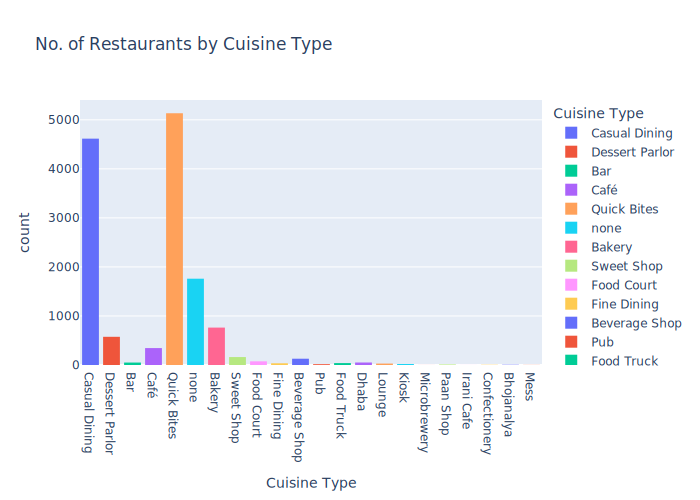

In [43]:
#5 Performing the exploratory data analysis
#Q1  How many restaurants are in Mumbai for each type of cuisine?
fig = px.histogram(zomato_df, x='CUSINE TYPE', color='CUSINE TYPE',
                   title= 'No. of Restaurants by Cuisine Type',
                   labels={'CUSINE TYPE':'Cuisine Type'})
fig.show()

In [44]:
#5Q2) What are the percentage of restaurants by Rating Type in Mumbai ?
rating_type_df = zomato_df['RATING_TYPE'].value_counts().reset_index()
rating_type_df.rename(columns={'index':'RATING TYPE', 'count':'COUNT OF RESTAURANTS'}, inplace=True)
rating_type_df

,RATING_TYPE,COUNT OF RESTAURANTS
0,Average,4984
1,Good,4263
2,Not rated,2297
3,Very Good,1145
4,NA,980
5,Excellent,96
6,Poor,56
7,Very Poor,4


Resorting to unclean kill browser.


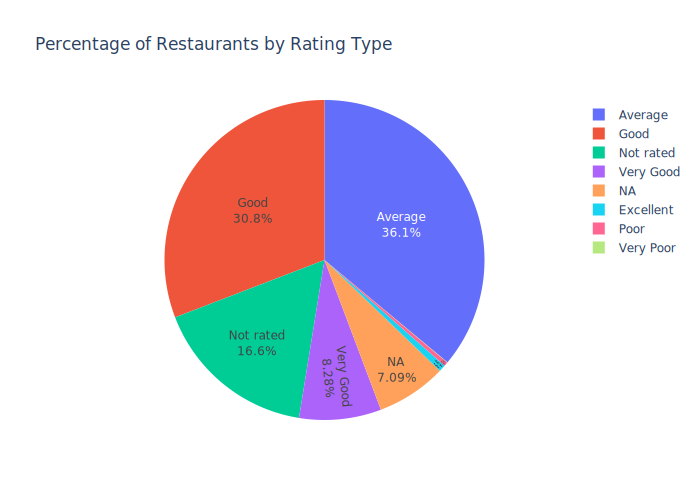

In [45]:
fig = px.pie(rating_type_df, names='RATING_TYPE', values='COUNT OF RESTAURANTS', color='RATING_TYPE',
title='Percentage of Restaurants by Rating Type').update_traces(textposition='inside', textinfo='percent+label')
fig.show()



In [46]:
#5Q3) Which are the Top 10 highest rated Seafood Restaurant in Mumbai?
seafood_df = zomato_df[zomato_df['CUSINE_CATEGORY'].str.contains('Seafood')]
seafood_df.sort_values(by='RATING',ascending=False).head(10)

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,Timing,DAYS_OPEN
7104,Thangabali,1000,"Seafood,South Indian,Mangalorean,Andhra,Kerala",Khar,Bar,"12noon to 4pm,7pm to 3am(Mon-Sun)",Excellent,4.7,564,"12noon to 4pm,7pm to 3am",Mon-Sun
13685,Maharashtra Lunch Home,600,"Maharashtrian,Malwani,Konkan,Seafood",Kharghar,Casual Dining,"11am to 345pm,7pm to 1145pm(Mon-Sun)",Excellent,4.6,209,"11am to 345pm,7pm to 1145pm",Mon-Sun
76,Ceremonial Kitchen & Co,1000,"Seafood,Maharashtrian,North Indian,Chinese",Thane,Casual Dining,1130am to 1130pm(Mon-Sun),Excellent,4.6,350,1130am to 1130pm,Mon-Sun
884,Rajmanya- Seafood family restaurant,800,"Maharashtrian,Konkan,Seafood",Vashi,Casual Dining,11am to 11pm(Mon-Sun),Excellent,4.5,178,11am to 11pm,Mon-Sun
902,The Harbour Bay - SeaFood Kitchen & Bar,2400,"Seafood,Beverages",Bandra,Casual Dining,12noon to 1am(Mon-Sun),Excellent,4.5,100,12noon to 1am,Mon-Sun
12433,Quarter Canteen,1100,"North Indian,Seafood,Chinese",Bandra,Casual Dining,"12noon to 330pm,7pm to 1am(Mon-Sun)",Excellent,4.5,573,"12noon to 330pm,7pm to 1am",Mon-Sun
3380,Peco Peco,700,"Chinese,Seafood,Asian",Powai,none,"12noon to 330pm,7pm to 1230AM(Mon-Sun)",Excellent,4.5,497,"12noon to 330pm,7pm to 1230AM",Mon-Sun
9954,Pi Bar and Kitchen,1600,"Continental,European,Italian,Seafood,Pizza,Des...",Andheri,Bar,"12noon to 6pm,7pm to 12midnight(Mon-Sun)",Excellent,4.5,2068,"12noon to 6pm,7pm to 12midnight",Mon-Sun
199,Malhar Lunch Home,900,"North Indian,Seafood,Mughlai",Mira Road,Casual Dining,"1030am to 4pm,7pm to 1230AM(Mon-Sun)",Very Good,4.4,1457,"1030am to 4pm,7pm to 1230AM",Mon-Sun
8890,Hardeep Punjab,1100,"North Indian,Chinese,Mughlai,Seafood",Sion,Casual Dining,11am to 1am(Mon-Sun),Very Good,4.4,871,11am to 1am,Mon-Sun


In [47]:
#5Q3) Which is the best Food Truck in Mumbai?
foodtruck_df = zomato_df[zomato_df['CUSINE TYPE'] == 'Food Truck']
foodtruck_df.sort_values(by='RATING',ascending=False).head(2)

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,Timing,DAYS_OPEN
262,Dumpling Delights,200,Momos,Matunga,Food Truck,430pm to 930pm(Mon-Sun),Very Good,4.3,212,430pm to 930pm,Mon-Sun
1017,Street Food Co.,250,"Fast Food,Chinese",Virar,Food Truck,6pm to 3am(Mon-Sun),Very Good,4.1,274,6pm to 3am,Mon-Sun


In [48]:
#5Q5) Which places have the highest rated restaurant for each Cuisine Type in Mumbai?
# Assuming restaurants having rating above 4.5
zomato_df['RATING'] = pd.to_numeric(zomato_df['RATING'], errors='coerce')
highest_rated_df = zomato_df[zomato_df['RATING'] >= 4.5]
highest_rated_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,Timing,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529,12noon to 130am,Mon-Sun
6,Persian Darbar,1300,"Biryani,North Indian,Chinese,Mughlai",Marol,Casual Dining,10am to 3am(Mon-Sun),Excellent,4.5,3058,10am to 3am,Mon-Sun
7,Tanatan,1500,Modern Indian,Juhu,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.7,1842,12noon to 130am,Mon-Sun
9,Plum by Bent Chair,1800,Asian,Lower Parel,Casual Dining,12noon to 1am(Mon-Sun),Excellent,4.7,1876,12noon to 1am,Mon-Sun
10,Angrezi Dhaba,1500,"North Indian,Chinese,Thai,European",Dadar,Bar,12noon to 1am(Mon-Sun),Excellent,4.5,2092,12noon to 1am,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...,...
14228,Zaika Crave - Club Aquaria,1300,"North Indian,Continental,Chinese,Desserts",Borivali,Casual Dining,"11am to 330pm,7pm to 1130pm(Mon,Tue,Wed...",Excellent,4.5,1302,"11am to 330pm,7pm to 1130pm","Mon,Tue,Wed..."
14234,Cone Culture,250,European,Kharghar,Casual Dining,"Closed(Mon),12noon to 11pm(Tue-Sun)",Excellent,4.6,492,Closed,"Mon,12noon to 11pm(Tue-Sun"
15007,Dessertino,300,"Desserts,Ice Cream",Kandivali,Dessert Parlor,11am to 12midnight(Mon-Sun),Excellent,4.8,184,11am to 12midnight,Mon-Sun
15051,Tick-eat,800,"North Indian,Italian,Chinese,Mexican,Lebanese",Mulund,Casual Dining,"1130am to 330pm,7pm to 1130pm(Mon-Sun)",Excellent,4.5,754,"1130am to 330pm,7pm to 1130pm",Mon-Sun


Resorting to unclean kill browser.


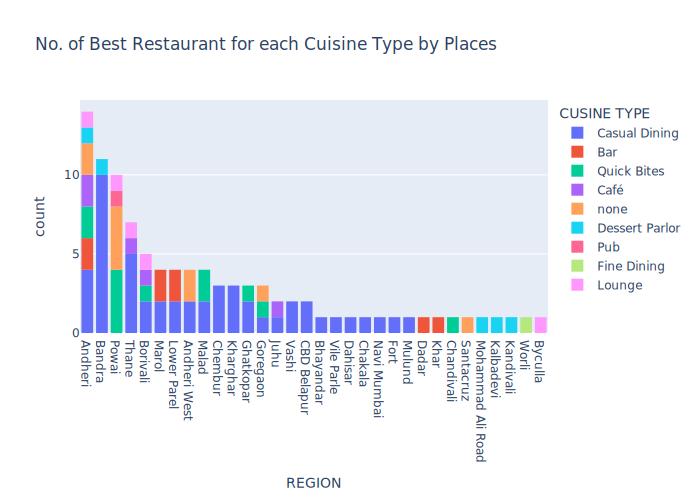

In [49]:
fig = px.histogram(highest_rated_df, x='REGION', color='CUSINE TYPE',
title= 'No. of Best Restaurant for each Cuisine Type by Places').update_xaxes(categoryorder="total descending")
fig.show()


In [50]:
#5Q6) What is the Avg Price Distibution of highest rated restaurant for each Cuisine Type in Mumbai?

zomato_df['PRICE'] = (zomato_df['PRICE']
    .astype(str)
    .str.replace('₹', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.extract('(\d+)', expand=False)
    .astype(float))


In [51]:
highest_rated_df = zomato_df[zomato_df['RATING'] >= 4.5]

highest_rated_price_df = highest_rated_df.groupby(by=['REGION', 'CUSINE TYPE'])['PRICE'].mean().reset_index()
highest_rated_price_df.head()

,REGION,CUSINE TYPE,PRICE
0,Andheri,Bar,1600.0
1,Andheri,Café,800.0
2,Andheri,Casual Dining,1212.5
3,Andheri,Dessert Parlor,300.0
4,Andheri,Lounge,1700.0


Resorting to unclean kill browser.


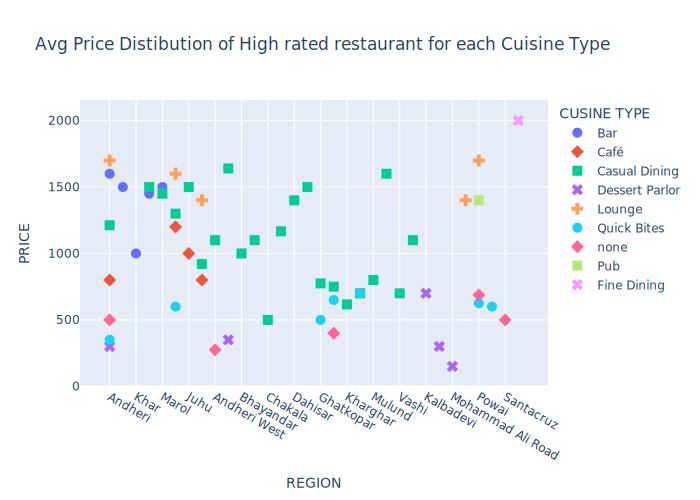

In [52]:
fig = px.scatter(highest_rated_price_df, x="REGION", y="PRICE", color="CUSINE TYPE", symbol="CUSINE TYPE",
title=' Avg Price Distibution of High rated restaurant for each Cuisine Type').update_traces(marker_size=10)
fig.show()

In [53]:
#5Q7) Which areas have a large number of Chinese Restaurant Market?
chinese_df = zomato_df[zomato_df['CUSINE_CATEGORY'].str.contains('Chinese')]
chinese_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,Timing,DAYS_OPEN
0,Hitchki,1200.0,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529,12noon to 130am,Mon-Sun
2,Chin Chin Chu,1800.0,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337,12noon to 1am,Mon-Sun
4,BKC DIVE,1200.0,"North Indian,Chinese,Continental",Bandra,Bar,1130am to 1am(Mon-Sun),Very Good,4.4,5995,1130am to 1am,Mon-Sun
5,Flea Bazaar Café,800.0,"American,Asian,Street Food,North Indian,Luckno...",Lower Parel,Café,12noon to 1am(Mon-Sun),Very Good,4.2,2042,12noon to 1am,Mon-Sun
6,Persian Darbar,1300.0,"Biryani,North Indian,Chinese,Mughlai",Marol,Casual Dining,10am to 3am(Mon-Sun),Excellent,4.5,3058,10am to 3am,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...,...
15071,Lucknow Zaika,500.0,"North Indian,Chinese",Kurla,Quick Bites,12noon to 2am(Mon-Sun),Average,2.6,36,12noon to 2am,Mon-Sun
15072,Zuha's Kitchen,400.0,"Chinese,North Indian,Mughlai",Mumbai Central,Quick Bites,"12noon to 4pm,730pm to 430am(Mon-Sun)",Average,3.3,13,"12noon to 4pm,730pm to 430am",Mon-Sun
15075,Tirupati Balaji,500.0,"Chinese,Fast Food,North Indian",Andheri,Casual Dining,"8am to 11pm,12midnight to 115am(Mon-Sun)",Good,3.5,267,"8am to 11pm,12midnight to 115am",Mon-Sun
15076,Hari Om Snack Bar,350.0,"Fast Food,South Indian,Chinese",Kandivali,Quick Bites,11am to 230am(Mon-Sun),Good,3.7,64,11am to 230am,Mon-Sun


In [70]:
chinese_rest_df = chinese_df.groupby(by='REGION').agg({'NAME' : 'count', 'PRICE' : 'mean'}).rename(columns= {'NAME' :'COUNT OF RESTAURANTS'})
chinese_rest_df = chinese_rest_df.sort_values('COUNT OF RESTAURANTS', ascending=False).head(25)
chinese_rest_df.head()


,COUNT OF RESTAURANTS,PRICE
REGION,,
Thane,461,557.169197
Mira Road,290,522.413793
Malad,221,568.099548
Andheri West,220,578.409091
Goregaon,210,518.333333


In [71]:
chinese_rest_df = chinese_df.groupby('REGION').agg(COUNT_OF_RESTAURANTS=('NAME', 'count'), PRICE=('PRICE', 'mean')).reset_index()
chinese_rest_df = chinese_rest_df.sort_values('COUNT_OF_RESTAURANTS', ascending=False).head(25)
chinese_rest_df.head()



,REGION,COUNT_OF_RESTAURANTS,PRICE
72,Thane,461,557.169197
52,Mira Road,290,522.413793
46,Malad,221,568.099548
4,Andheri West,220,578.409091
28,Goregaon,210,518.333333


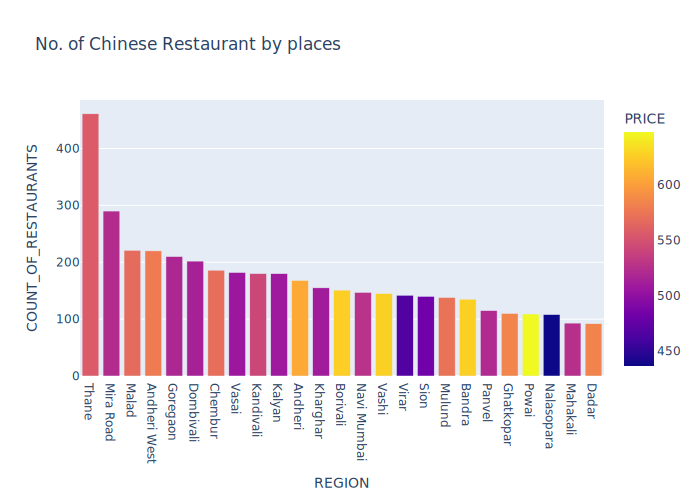

In [73]:
fig = px.bar(chinese_rest_df, x='REGION', y='COUNT_OF_RESTAURANTS', color='PRICE', title= 'No. of Chinese Restaurant by places')
fig.show()



In [74]:
#5Q8) Is there a relation between Price and Rating by each Cuisine Type?
price_rating_df = zomato_df.groupby(['CUSINE TYPE', 'RATING'])['PRICE'].mean().reset_index()
price_rating_df


,CUSINE TYPE,RATING,PRICE
0,Bakery,0.0,314.772727
1,Bakery,2.7,400.000000
2,Bakery,2.8,285.714286
3,Bakery,2.9,328.571429
4,Bakery,3.0,300.000000
...,...,...,...
293,none,4.3,683.333333
294,none,4.4,555.000000
295,none,4.5,420.000000
296,none,4.6,687.500000


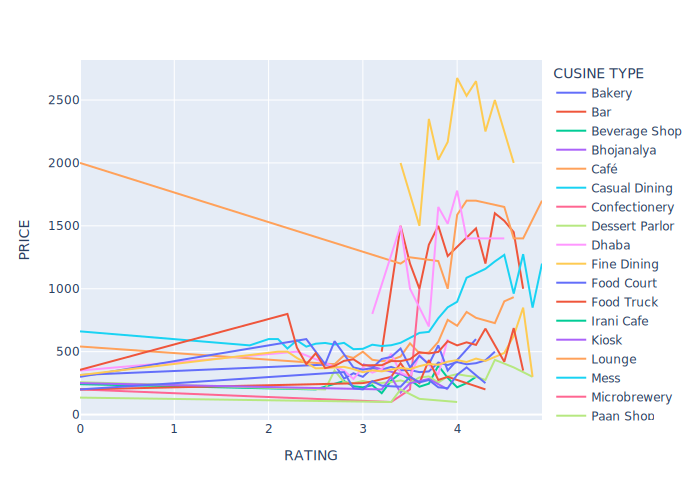

In [76]:
fig = px.line(price_rating_df, y="PRICE", x="RATING",color='CUSINE TYPE')
fig.show()

In [77]:
#5Q9) Is there a relation between Region and Price?
region_price_df = zomato_df.groupby(['REGION'])['PRICE'].mean().reset_index()
region_price_df

,REGION,PRICE
0,Airoli,431.725888
1,Alibaug,647.222222
2,Ambernath,498.571429
3,Andheri,552.661290
4,Andheri West,494.345114
...,...,...
77,Vikhroli,442.134831
78,Vile Parle,436.165049
79,Virar,418.400000
80,Wadala,391.964286


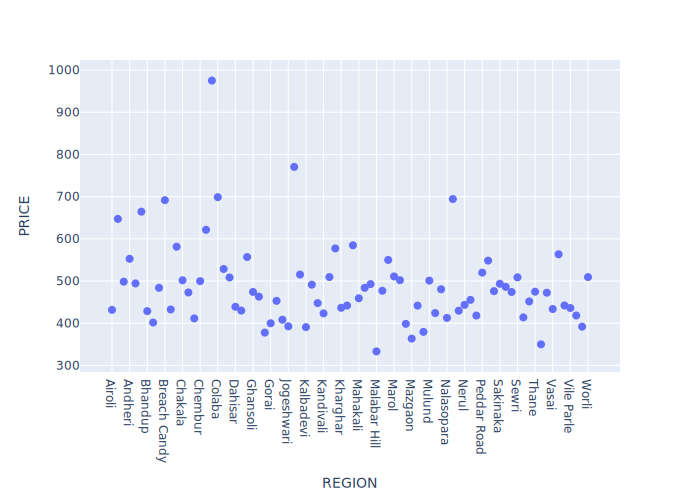

In [78]:
fig = px.scatter(region_price_df, x="REGION", y="PRICE").update_traces(marker_size=8)
fig.show()


Q10) Find the list of Affordable Restaurants?

The criteria for Affordable Restaurants would be:-
1) Low Price 2) High Rated
First step will be to find the restaurants with average cost 1/4th the average cost of most expensive restaurant in our dataframe.
Let me explain:-The most expensive restaurant has an average meal cost= 6000. We'll try to stay economical and only pick the
restaurants that are 1/4th of 6000

In [81]:
max_price = zomato_df['PRICE'].max()
one_fourth_price = max_price/4
one_fourth_price

1250.0

In [82]:
# Finding list of restaurants that have price less than and equal to 1/4th of the max price i.e Finding Cheap Restaurant
aff_rest_df = zomato_df[['NAME', 'PRICE', 'CUSINE_CATEGORY', 'REGION', 'CUSINE TYPE']]
aff_rest_df = aff_rest_df[aff_rest_df['PRICE'] <= 1250]
aff_rest_df.sort_values(by='PRICE', inplace=True)
aff_rest_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE
14987,New Good Luck Restaurant,0.0,"North Indian,Chinese,Fast Food,Beverages",Andheri,Quick Bites
14998,Foodies House,0.0,Chinese,Goregaon,none
14989,Patil Fast Food Centre,0.0,Fast Food,Charni Road,Quick Bites
14973,BKC - Thalis & Snacks,0.0,"North Indian,Fast Food",Thane,none
14971,Adler's Den,0.0,Desserts,Andheri,none
...,...,...,...,...,...
2850,The Mint Leaf Kitchen n Bar,1200.0,"Chinese,North Indian,South Indian,Fast Food",Airoli,Casual Dining
195,D:OH!,1200.0,"Fast Food,Italian,Beverages",Andheri,Casual Dining
6045,Fabelle at The Chocolate Boutique - ITC Grand ...,1250.0,Desserts,Parel,Dessert Parlor
7301,SamBar Pub & Kitchen,1250.0,"Finger Food,South Indian,North Indian",Khar,Pub


In [84]:
# Finding the highest rated list of restaurants
highrate_rest_df = zomato_df[['NAME', 'PRICE', 'CUSINE_CATEGORY', 'REGION', 'CUSINE TYPE','RATING']]
highrate_rest_df = highrate_rest_df[highrate_rest_df['RATING'] >= 4.5]
highrate_rest_df.sort_values(by='PRICE', inplace=True)
highrate_rest_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,RATING
1502,Cake Centre-The Dessert Maker,150.0,Desserts,Mohammad Ali Road,Dessert Parlor,4.6
763,Curry And Combos Twist,200.0,"North Indian,Chinese",Andheri,Quick Bites,4.5
807,Moussestruck,200.0,Desserts,Andheri West,none,4.5
14234,Cone Culture,250.0,European,Kharghar,Casual Dining,4.6
725,Belo Pops,300.0,"Ice Cream,Desserts,Beverages",Andheri,none,4.5
...,...,...,...,...,...,...
5335,Mia Cucina,2000.0,Italian,Bandra,Casual Dining,4.5
1786,Global Fusion,2000.0,"Chinese,Japanese,Asian,North Indian",Worli,Fine Dining,4.6
8887,Drifters Tap Station,2000.0,"North Indian,Continental,European,American",Bandra,Casual Dining,4.5
12625,House of Mandarin,2100.0,"Chinese,Sushi,Asian",Bandra,Casual Dining,4.5


In [86]:
#Now, we'll merge the aff_rest_df with highrate_rest_df to obtain the intersection i.e the list of Affordable Restaurants
highrate_aff_df = pd.merge(aff_rest_df, highrate_rest_df, how='inner', on=['NAME', 'REGION'])
highrate_aff_df = highrate_aff_df[['NAME', 'PRICE_x', 'CUSINE_CATEGORY_x', 'REGION', 'CUSINE TYPE_x']]
highrate_aff_df.rename(columns={'NAME':'NAME', 'PRICE_x':'PRICE', 'CUSINE_CATEGORY_x':'CUSINE_CATEGORY',
'REGION':'REGION', 'CUSINE TYPE_x':'CUSINE TYPE'},inplace=True)



In [88]:
# Affordable Restaurants with low price and high rating
highrate_aff_df


,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE
0,Cake Centre-The Dessert Maker,150.0,Desserts,Mohammad Ali Road,Dessert Parlor
1,Curry And Combos Twist,200.0,"North Indian,Chinese",Andheri,Quick Bites
2,Moussestruck,200.0,Desserts,Andheri West,none
3,Cone Culture,250.0,European,Kharghar,Casual Dining
4,Smiley Pops,300.0,"Desserts,Ice Cream,Beverages,Sandwich",Andheri,Dessert Parlor
...,...,...,...,...,...
60,Angrezi Patiyalaa,1200.0,"North Indian,Finger Food,American,Mexican,Chinese",Andheri,Casual Dining
61,Invento,1200.0,"Chinese,Fast Food,North Indian,Italian,Mexican",Lower Parel,Casual Dining
62,Hitchki,1200.0,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining
63,Culinary Tales,1200.0,"Chinese,European,Continental,Salad,Italian,Pizza",Andheri West,Casual Dining


Q10) Find the list of most Reliable Restaurants?
The criteria for most Reliable Restaurants would be:-
1) Low Price 2) High Rated 3) Large No. of Votes
First step will be to find the restaurants with Votes greater than Mean of Votes


In [92]:
zomato_df['VOTES'].dtype

dtype('O')

In [93]:
zomato_df['VOTES'] = pd.to_numeric(zomato_df['VOTES'], errors='coerce')
mean_votes = zomato_df['VOTES'].mean()
mean_votes

162.1808639833449

In [94]:
#Finding list of restaurants that have Votes greater than and equal to Mean of Vote
mean_rest_df = zomato_df[['NAME', 'PRICE', 'CUSINE_CATEGORY', 'REGION', 'CUSINE TYPE', 'VOTES']]
mean_rest_df = mean_rest_df[mean_rest_df['VOTES'] > 162]
mean_rest_df.sort_values(by='VOTES', inplace=True)
mean_rest_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,VOTES
1422,Ranjeet Chinese Pure Veg,500.0,Chinese,Thane,Casual Dining,163.0
8006,Labella Cafe,650.0,"Cafe,Continental,Italian,Beverages,Desserts,No...",Andheri West,Café,163.0
6134,Shubhlaxmi,600.0,"South Indian,Chinese,North Indian,Street Food",Chembur,Casual Dining,163.0
1555,Keventers,400.0,"Beverages,Ice Cream,Desserts",Kharghar,Beverage Shop,163.0
1717,Vidarbh King Nagpuri Saoji,300.0,Maharashtrian,Thane,Quick Bites,163.0
...,...,...,...,...,...,...
8539,Leopold Cafe & Bar,1600.0,"American,Chinese,Mughlai,Italian",Colaba,Casual Dining,7327.0
1251,Joey's Pizza,800.0,Pizza,Malad,Quick Bites,7350.0
5337,Chili's American Grill & Bar,1400.0,"American,Mexican,Burger,Tex-Mex",Powai,Casual Dining,7377.0
3751,Prithvi Cafe,700.0,"Cafe,Fast Food",Juhu,Café,8000.0


These are the most reliable, highest rated and affordable restaurants:-
We obtain this dataframe by simply taking the intersection of highrate_aff_df & mean_rest_df
This dataframe obtained below shows the restaurants whose:
Cost is below 1250
Rating is above 4.5
Votes are above 162

In [95]:
reliable_rest_df = pd.merge(mean_rest_df, highrate_aff_df, how='inner', on=['NAME', 'REGION'])
reliable_rest_df = reliable_rest_df[['NAME', 'PRICE_x', 'CUSINE_CATEGORY_x', 'REGION', 'CUSINE TYPE_x']]
reliable_rest_df.rename(columns={'NAME':'NAME', 'PRICE_x':'PRICE', 'CUSINE_CATEGORY_x':'CUSINE_CATEGORY',
'REGION':'REGION', 'CUSINE TYPE_x':'CUSINE TYPE'},inplace=True)
reliable_rest_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE
0,Cookstory,700.0,"North Indian,Chinese,Mughlai",Andheri,none
1,Rajmanya- Seafood family restaurant,800.0,"Maharashtrian,Konkan,Seafood",Vashi,Casual Dining
2,Fresh Food Co.,500.0,"Continental,Healthy Food,Salad,Beverages,Desse...",Santacruz,none
3,Dessertino,300.0,"Desserts,Ice Cream",Kandivali,Dessert Parlor
4,Invento,1200.0,"Chinese,Fast Food,North Indian,Italian,Mexican",Lower Parel,Casual Dining
5,Maharashtra Lunch Home,600.0,"Maharashtrian,Malwani,Konkan,Seafood",Kharghar,Casual Dining
6,Regano's,600.0,"Continental,Fast Food,Italian,Desserts",Malad,Casual Dining
7,Big Bang Cuurry,350.0,"North Indian,Biryani,Rolls",Andheri West,none
8,Sandy's Den,1000.0,"Fast Food,Bar Food",Chembur,Casual Dining
9,Angrezi Patiyalaa,1200.0,"North Indian,Finger Food,American,Mexican,Chinese",Andheri,Casual Dining
